In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

*loading data*

In [ ]:
import json

file='/content/drive/MyDrive/Machine Learning/Books_small.json'

book_review_list=[]

with open(file) as f:
  for i in f:
    review_book=json.loads(i)

    books_dictionary={}
    books_dictionary['reviewText']=review_book['reviewText']
    books_dictionary['overall']=review_book['overall']

    book_review_list.append(books_dictionary)
    

In [ ]:
review_df=pd.DataFrame(book_review_list)
review_df

,reviewText,overall
0,Da Silva takes the divine by storm with this u...,4.0
1,For me personally it's the most disappointing ...,2.0
2,"Very simple book, but leaves you feeling good....",4.0
3,I read a library copy of this exceptionally we...,5.0
4,With the government knowing this could happen ...,5.0
...,...,...
995,I thoroughly enjoyed this book. I've read the ...,5.0
996,I was impressed with not only the characters o...,5.0
997,I like the characters. I had read the short s...,5.0
998,"She got way she wanted,but can she pick the ri...",5.0


In [ ]:
def get_sentiment(score):
  if score<3.0:
    return 'Negative'
  elif score==3:
    return 'Neutral'
  else:
    return 'Positive'

review_df['sentiment']=review_df['overall'].apply(get_sentiment)
review_df

,reviewText,overall,sentiment
0,Da Silva takes the divine by storm with this u...,4.0,Positive
1,For me personally it's the most disappointing ...,2.0,Negative
2,"Very simple book, but leaves you feeling good....",4.0,Positive
3,I read a library copy of this exceptionally we...,5.0,Positive
4,With the government knowing this could happen ...,5.0,Positive
...,...,...,...
995,I thoroughly enjoyed this book. I've read the ...,5.0,Positive
996,I was impressed with not only the characters o...,5.0,Positive
997,I like the characters. I had read the short s...,5.0,Positive
998,"She got way she wanted,but can she pick the ri...",5.0,Positive


In [ ]:
review_df['sentiment'].value_counts()

Positive    835
Neutral     103
Negative     62
Name: sentiment, dtype: int64

*preparing data*

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(review_df['reviewText'], review_df['sentiment'], test_size=0.3, stratify=review_df['sentiment'])

In [ ]:
y1_test.value_counts()

Positive    250
Neutral      31
Negative     19
Name: sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_v_book_review= CountVectorizer()

In [ ]:
vectorized_reviewText_train_x= c_v_book_review.fit_transform(x1_train.values).toarray()
vectorized_reviewText_train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorized_reviewText_test_x=c_v_book_review.transform(x1_test.values).toarray()

*Model Selection and evaluation*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# LogisticRegression

book_review_logistic=LogisticRegression(max_iter=1000)
book_review_logistic.fit(vectorized_reviewText_train_x,y1_train)

LogisticRegression(max_iter=1000)

In [ ]:
book_review_logistic.score(vectorized_reviewText_test_x,y1_test)

0.82

In [ ]:
book_review_logistic.predict(vectorized_reviewText_test_x[[5]])

array(['Positive'], dtype=object)

In [ ]:
# SVC

book_review_svc=SVC()
book_review_svc.fit(vectorized_reviewText_train_x,y1_train)

SVC()

In [ ]:
book_review_svc.score(vectorized_reviewText_test_x,y1_test)

0.8333333333333334

In [ ]:
book_review_svc.predict(vectorized_reviewText_test_x[[5]])

array(['Positive'], dtype=object)

In [ ]:
# RandomForestClassifier

book_review_random_forest=RandomForestClassifier()
book_review_random_forest.fit(vectorized_reviewText_train_x,y1_train)

RandomForestClassifier()

In [ ]:
book_review_random_forest.score(vectorized_reviewText_test_x,y1_test)

0.8333333333333334

In [ ]:
book_review_random_forest.predict(vectorized_reviewText_test_x[[5]])

array(['Positive'], dtype=object)

In [ ]:
# Naive Bias: MultinomialNB

book_review_naive_bias= MultinomialNB()
book_review_naive_bias.fit(vectorized_reviewText_train_x,y1_train)

MultinomialNB()

In [ ]:
book_review_naive_bias.score(vectorized_reviewText_test_x,y1_test)

0.8333333333333334

In [ ]:
book_review_naive_bias.predict(vectorized_reviewText_test_x[[5]])

array(['Positive'], dtype='<U8')

*calculating F1 score (F1 score is very important if the data set is imbalanced.)*

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# LogisticRegression
f1_score(y1_test,book_review_logistic.predict(vectorized_reviewText_test_x),average=None,labels=['Positive','Neutral','Negative'])

array([0.9039548 , 0.17391304, 0.17391304])

In [ ]:
# SVC
f1_score(y1_test,book_review_svc.predict(vectorized_reviewText_test_x),average=None,labels=['Positive','Neutral','Negative'])

array([0.90909091, 0.        , 0.        ])

In [ ]:
# RandomForestClassifier
f1_score(y1_test,book_review_random_forest.predict(vectorized_reviewText_test_x),average=None,labels=['Positive','Neutral','Negative'])

array([0.90909091, 0.        , 0.        ])

In [ ]:
# Naive Bias: MultinomialNB
f1_score(y1_test,book_review_naive_bias.predict(vectorized_reviewText_test_x),average=None,labels=['Positive','Neutral','Negative'])

array([0.90909091, 0.        , 0.        ])

*Confusion Matrix*

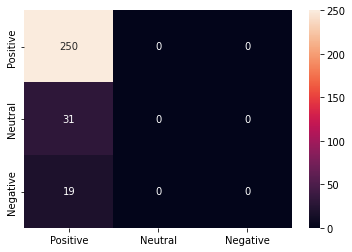

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y1_predict = book_review_svc.predict(vectorized_reviewText_test_x)
labels = ['Positive','Neutral','Negative']

cm = confusion_matrix(y1_test, y1_predict, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')

*Handling Imbalanced data*

In [ ]:
# we have to vectorize all data before creating model with SMOTE. 
from sklearn.feature_extraction.text import CountVectorizer

new_c_v_book_review=CountVectorizer()

vectorized_reviewText_all= new_c_v_book_review.fit_transform(review_df['reviewText'].values).toarray()

# To create SMOTE model data needs to be in tabular format. So creating pandas dataframe
vectorized_reviewText_all_df=pd.DataFrame(vectorized_reviewText_all)

In [ ]:
# creating equal number of positive,neagative and neutral samples with SMOTE

from imblearn.over_sampling import SMOTE

In [ ]:
# creating SMOTE model

smote=SMOTE()

In [ ]:
# fitting data in SMOTE model

x_sm,y_sm=smote.fit_resample(vectorized_reviewText_all_df,review_df['sentiment'])

In [ ]:
y_sm.value_counts()

Positive    835
Negative    835
Neutral     835
Name: sentiment, dtype: int64

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_sm, y_sm, test_size=0.3, stratify=y_sm)

In [ ]:
# checking accuracy of SVC with new data set

new_book_review_svc=SVC()
new_book_review_svc.fit(x2_train,y2_train)

SVC()

In [ ]:
new_book_review_svc.score(x2_test,y2_test)

0.738031914893617

In [ ]:
# checking new f1 score (it has improved significantly)

f1_score(y2_test,new_book_review_svc.predict(x2_test),average=None,labels=['Positive','Neutral','Negative'])

array([0.85020243, 0.60732984, 0.72929936])

In [ ]:
# checking a test set if that works with our SVC model

test_set=['I love his writing style. I enjoy the characters. The books have good twist and turn', 'Bad book, I will suggest not to buy','Horrible , total waste of time','I am impressed with your work','For me personally it is the most disappointing book I have read.I had to force myself to keep reading it. Hard to stay focused when half a book describes approximately 4-6 hours.']
test_set_vectorize=new_c_v_book_review.transform(test_set).toarray()

In [ ]:
new_book_review_svc.predict(test_set_vectorize)   # Poor Performance from SVM

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative'],
      dtype=object)

In [ ]:
# checking accuracy of Naive_Bias with new data set

new_book_review_naive_bias= MultinomialNB()
new_book_review_naive_bias.fit(x2_train,y2_train)

MultinomialNB()

In [ ]:
new_book_review_naive_bias.score(x2_test,y2_test)

0.7898936170212766

In [ ]:
# checking new f1 score (it has improved significantly)

f1_score(y2_test,new_book_review_naive_bias.predict(x2_test),average=None,labels=['Positive','Neutral','Negative'])

array([0.87329435, 0.75232775, 0.74008811])

In [ ]:
# checking a test set if that works with our model

test_set=['I love his writing style. I enjoy the characters. The books have good twist and turn', 'Bad book, I will suggest not to buy','Horrible food, waste of time','I am in love with your work','This is a very well written and entertaining novel.']
test_set_vectorize=new_c_v_book_review.transform(test_set).toarray()

In [ ]:
new_book_review_naive_bias.predict(test_set_vectorize)   # Good Performance by Naive Bias

array(['Positive', 'Negative', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

In [ ]:
# checking accuracy of RandomForestClassifier with new data setRandomForestClassifier

new_book_review_random_forest=RandomForestClassifier()
new_book_review_random_forest.fit(x2_train,y2_train)

RandomForestClassifier()

In [ ]:
new_book_review_random_forest.score(x2_test,y2_test)

0.8962765957446809

In [ ]:
# checking new f1 score (it has improved significantly)

f1_score(y2_test,new_book_review_random_forest.predict(x2_test),average=None,labels=['Positive','Neutral','Negative'])

array([0.87966805, 0.88675624, 0.92215569])

In [ ]:
# checking a test set if that works with our model

test_set=['I love his writing style. I enjoy the characters. The books have good twist and turn', 'He is a bad writer, should get 1 star for his new book','Horrible and dissapointing , no twist and turns, waste of time','I am impressed with the writers work. Well done. Definitely recommend.','This is a very good novel.']
test_set_vectorize=new_c_v_book_review.transform(test_set).toarray()

In [ ]:
new_book_review_random_forest.predict(test_set_vectorize)   # Good Performance by RandomForestClassifier

array(['Positive', 'Negative', 'Negative', 'Positive', 'Negative'],
      dtype=object)

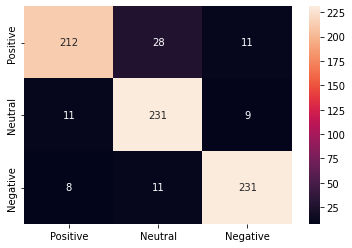

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y2_predict = new_book_review_random_forest.predict(x2_test)
labels = ['Positive','Neutral','Negative']

cm = confusion_matrix(y2_test, y2_predict, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')